# ¡Hola Carolina! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Carolina, tu análisis está muy bien desarrollado, lograste estructurar correctamente la carga y transformación de los datos, realizaste visualizaciones claras y precisas, y llevaste a cabo análisis que conectan bien con el contexto del estudio. También se valora el cuidado que tuviste en la documentación del proceso y en el uso de técnicas estadísticas para validar hipótesis. 

Como punto a considerar, podrías seguir optimizando la visualización de resultados unificando algunas gráficas y ajustando pequeños detalles de estilo usando Markdown para mejorar la presentación del notebook. 

Vas en una muy buena dirección, sigue afinando esos detalles y verás cómo tu trabajo se fortalece aún más en claridad y profundidad.

¡Te deseo muchos éxitos en tu próximo Sprint! 🚀

*Estado del Proyecto:* **Aprobado**


</div>

-------

In [1]:
#identificar patrones que determinen si un juego tiene éxito o no

In [2]:
#cargar librerias
import pandas as pd #manejo de dataframe
import matplotlib.pyplot as plt #uso de graficos
from scipy import stats as st
import numpy as np

In [3]:
#cargar el dataframe
df = pd.read_csv('/datasets/games.csv')

In [4]:
#ver info general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#nombres de las columnas a minusculas
nombres_minusculas = []
for nombre in df.columns:
    nuevo_nombre = nombre.strip().lower()
    nombres_minusculas.append(nuevo_nombre)
df.columns = nombres_minusculas

In [6]:
print(df.sample(5))

                                      name platform  year_of_release  \
16042                               UNO 52       DS           2006.0   
8015   Ar tonelico 2: Melody of Metafalica      PS2           2007.0   
5145                    Virtua Fighter 3tb       DC           1998.0   
8195                              MindJack      PS3           2011.0   
15363                            So Blonde       PC           2008.0   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16042          Misc      0.01      0.00      0.00         0.00           NaN   
8015   Role-Playing      0.04      0.03      0.11         0.01           NaN   
5145       Fighting      0.00      0.00      0.37         0.00           NaN   
8195        Shooter      0.07      0.07      0.00         0.03          44.0   
15363     Adventure      0.00      0.02      0.00         0.00           NaN   

      user_score rating  
16042        tbd      E  
8015         NaN    NaN  
5145    

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `sample`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 

Además es una excelente práctica convertir los nombres de las columnas a minúsculas para facilitar el trabajo posterior y evitar errores por tener una combinación de mayúsculas y minúsculas.

</div>

In [7]:
#CAMBIAR LOS TIPOS DE DATOS
#año a int - esto ayuda en el uso de la memoria
df['year_of_release'] = df['year_of_release'].astype('Int64') #pasar a int para que pueda soportar nulos
# ESTA LINEA ES OPCIONAL: 
    #df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y', errors='coerce') #se debe pasar a int primero para que el datatime pueda usarse
    #df['year_of_release'] = df['year_of_release'].dt.year solo tener el año y no el dia y mes por defecto
#usar datatime no es necesario aqui ya que solo tenemos el año, en caso que quererlo se ppuede ejecuta

#columna especifica para los datos tbd - esto para poder cambiar el tipo de dato sin perder estos datos
df['user_score_tbd'] = df['user_score'] == 'tbd' #esto solo daria true o false


#cambiar tdb a 0 antes de cambiar datos - esto para poder tener un mejor control antes de la conversion, recordemos que esta columna es string
df['user_score'] = df['user_score'].replace('tbd', '0')
#pasarla a float
df['user_score'] = df['user_score'].astype('float64')


#AQUI ES OPCIONAL UN METODO O OTRO, PUSE LOS 2 PARA MEJOR APRECIACION
#opcion 1: poner los puntuajes /10 en deciamles TIPO FLOAT
df['critic_score_10'] = df['critic_score'] / 10 #ir sobre 10 como user_score
df['user_score_10'] = df['user_score'] 
#esto si queremos convervar las puntuaciones con decimales

#opcion 2: poner los puntuajes /100 y en tipo int
df['critic_score'] = df['critic_score'].astype('Int64') #int64 maneja NaN, aun no verifico si los hay o no pero es una media
df['user_score'] = (df['user_score'] * 10).astype('Int64')
#segunda forma, ocupa menos espacio en memoria 

#renombrar para un nombre mas claro
new_columns ={ 
    'critic_score': 'critic_score_100', 
    'user_score': 'user_score_100',
    }
df  = df.rename(columns = new_columns)


In [8]:
print(df.sample(5))
print('---------------')
print(df.dtypes) 

                                           name platform  year_of_release  \
3770                             Virtual Soccer     SNES             1993   
14370                             Silverlicious       DS             2012   
731    The Legend of Zelda: Link's Awakening DX       GB             1998   
783              PES 2009: Pro Evolution Soccer      PS3             2008   
14804                           Auto Modellista       GC             2003   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score_100  \
3770      Sports      0.00      0.00      0.53         0.00              <NA>   
14370     Action      0.03      0.00      0.00         0.00              <NA>   
731    Adventure      1.00      0.63      0.45         0.13              <NA>   
783       Sports      0.11      1.33      0.40         0.26              <NA>   
14804     Racing      0.02      0.01      0.00         0.00                62   

       user_score_100 rating  user_score_tbd  crit

In [9]:
#ver nulos
print(df.isna().sum())
print('---------------')
#rellenar valores nulos
df['name'].fillna('Juego desconocido', inplace = True) #es mejor ser claro y especificar que no se tiene a un NaN
df['genre'].fillna('Sin genero', inplace = True)
df['rating'].fillna('Sin clasificación', inplace = True)

#volver a ver nulos
print(df.isna().sum())
print('---------------')

print(f"Valores TBD encontrados: {df['user_score_tbd'].sum()}") #con esto podemos ver que no todos los juegos estan en tbd, algunos simplemente no tienen un user_score, recordemos que tbd salio de esa columna

#el porque dar esos valores ayuda a visualizar la falta de datos, es mas comprensible que un NaN
#el porque no di un valor a las demas columnas es el que puedan distorsionar los datos, no es conveniente dar datos inventados si estos se van a usar para hipotesis
#el porque faltan datos puede deberse a que aun no son claros o recaudados, incluso que pueden ser muy viejos para tener cifras exactas
#la columna TBD se separo anteriormente para no perder los datos, en caso de que se requieran puede hacerse una compracion

name                   2
platform               0
year_of_release      269
genre                  2
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score_100    8578
user_score_100      6701
rating              6766
user_score_tbd         0
critic_score_10     8578
user_score_10       6701
dtype: int64
---------------
name                   0
platform               0
year_of_release      269
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score_100    8578
user_score_100      6701
rating                 0
user_score_tbd         0
critic_score_10     8578
user_score_10       6701
dtype: int64
---------------
Valores TBD encontrados: 2424


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has realizado un trabajo muy completo y detallado en la transformación de los datos, destacando especialmente en el manejo de valores nulos y en la conversión de tipos de datos para optimizar memoria y análisis. Es positivo cómo has documentado el razonamiento detrás de cada decisión, lo cual facilita la comprensión del flujo del código. 

Un punto de mejora sería evitar aplicar ambas opciones de transformación de puntajes simultáneamente, ya que puede generar redundancia o confusión; te recomiendo seleccionar una según el objetivo del análisis. 

Acá te comparto un artículo donde hablan sobre diferentes [métodos de manejo de datos faltanes](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python) que seguro te serán útiles en futuros proyectos.
</div>

In [10]:
#calcular las ventas totales
df['ventas_totales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']+ df['other_sales']
print(df.sample(5))

                                        name platform  year_of_release  \
231   Uncharted: The Nathan Drake Collection      PS4             2015   
3997                                     Wet     X360             <NA>   
2142                   Mortal Kombat Trilogy      N64             1996   
8578                           Hydro Thunder      N64             2000   
5714                     Birthday Party Bash      Wii             2009   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score_100  \
231     Action      2.07      1.71      0.08         0.76                86   
3997   Shooter      0.23      0.21      0.01         0.05                69   
2142  Fighting      0.72      0.22      0.00         0.02              <NA>   
8578    Racing      0.13      0.03      0.00         0.00              <NA>   
5714      Misc      0.29      0.00      0.00         0.02              <NA>   

      user_score_100             rating  user_score_tbd  critic_score_10  \
231 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo obteniendo las ventas totales. Si quieres optimizar la suma puedes hacerlo así:

```python
df['ventas_totales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

```

</div>

In [11]:
#años de los juegos
serie_agnos = df['year_of_release']
serie_agnos = serie_agnos.sort_values(ascending=True)
print(serie_agnos.unique()) #datos diferentes
print('---------------')
print(serie_agnos.nunique()) #cuantos datos diferentes
print('---------------')

#cantidad para cada año
conteo_juegos = {}
for agno_juego in serie_agnos:
    if agno_juego in conteo_juegos:
        conteo_juegos[agno_juego] += 1 
    else:
        conteo_juegos[agno_juego] = 1
conteo_juegos["Sin año"] = conteo_juegos.pop(pd.NA)  # cambiar <NA> a "Sin año"
print(conteo_juegos)
#el año que tiene mas juegos es 2009 con 1426

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, <NA>]
Length: 38, dtype: Int64
---------------
37
---------------
{1980: 9, 1981: 46, 1982: 36, 1983: 17, 1984: 14, 1985: 14, 1986: 21, 1987: 16, 1988: 15, 1989: 17, 1990: 16, 1991: 41, 1992: 43, 1993: 62, 1994: 121, 1995: 219, 1996: 263, 1997: 289, 1998: 379, 1999: 338, 2000: 350, 2001: 482, 2002: 829, 2003: 775, 2004: 762, 2005: 939, 2006: 1006, 2007: 1197, 2008: 1427, 2009: 1426, 2010: 1255, 2011: 1136, 2012: 653, 2013: 544, 2014: 581, 2015: 606, 2016: 502, 'Sin año': 269}


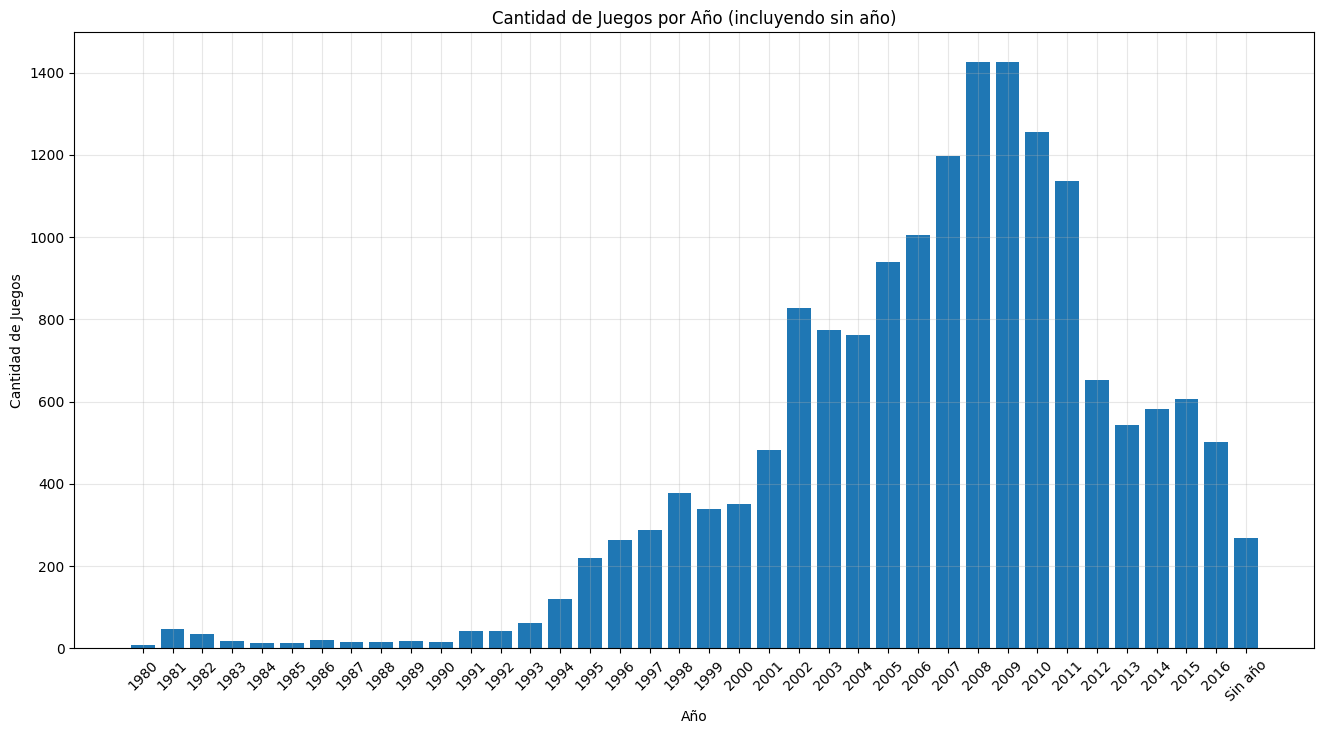

In [12]:
#graficar juegos por año
# Convertir años a strings
años_str = []
for año in conteo_juegos.keys():
    if año != "Sin año":
        años_str.append(str(año))
    else:
        años_str.append(año)

conteos = list(conteo_juegos.values())


plt.figure(figsize=(16, 8))  # Un poco más ancho para acomodar todas las etiquetas
plt.bar(años_str, conteos)
plt.title('Cantidad de Juegos por Año (incluyendo sin año)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


In [13]:
#aqui podemos ver mejor todo esto, vemos que hubo un gran aumento en los videojuegos, siendo el apogeo entre 2007-2011, luego de esto las barras cayendo grasticamente

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo! La gráfica muestra un crecimiento hasta 2008-2009, seguido de una caída en lanzamientos. Esto podría deberse al éxito de consolas como PS3 y Xbox 360, y luego a cambios en la industria: más enfoque en calidad, auge de juegos móviles, distribución digital o la crisis de 2008.


</div>

In [14]:
#elegir plataforma con mayores ventas totales

ventas_por_plataforma = df.groupby('platform')['ventas_totales'].sum()  # Sumar ventas por plataforma

ventas_por_plataforma = ventas_por_plataforma.sort_values(ascending=False) 

top_platforms = ventas_por_plataforma.head(5).index  #solo agarramos el nombre de los indices que son las plataformas
print(ventas_por_plataforma.head(5))
print('-----------')
print(top_platforms)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: ventas_totales, dtype: float64
-----------
Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')


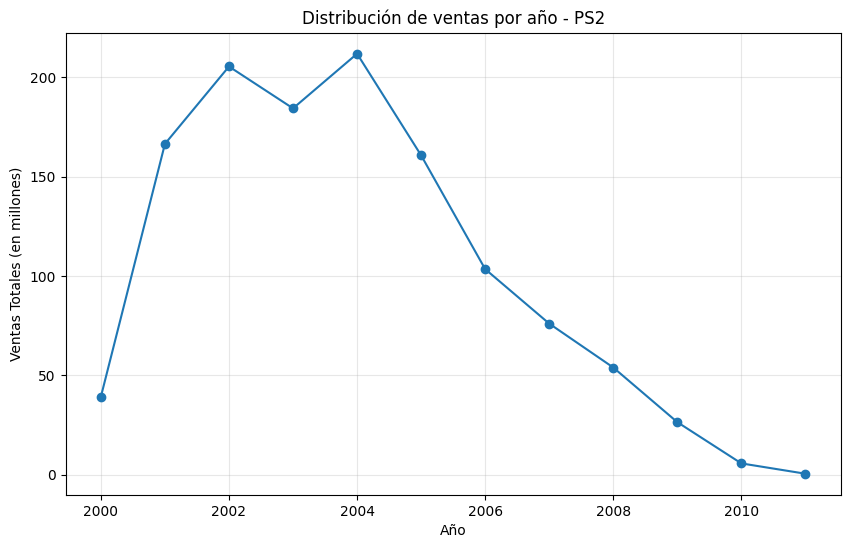

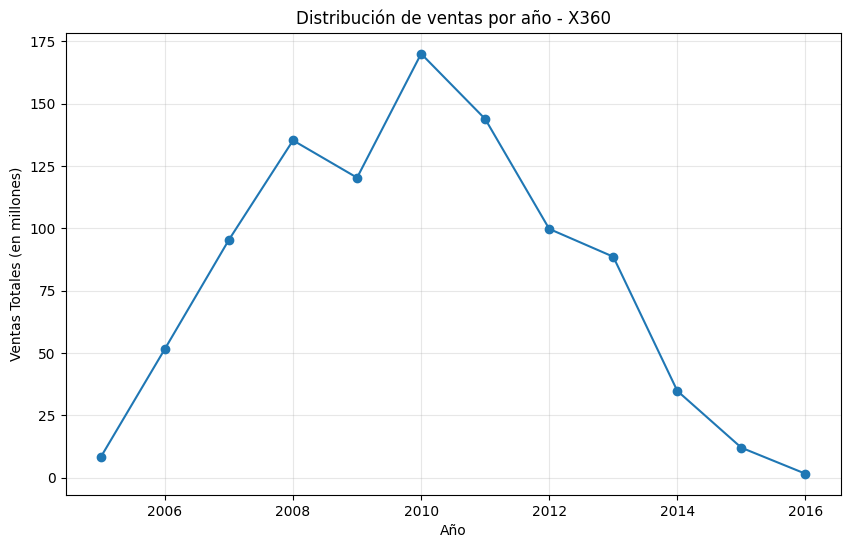

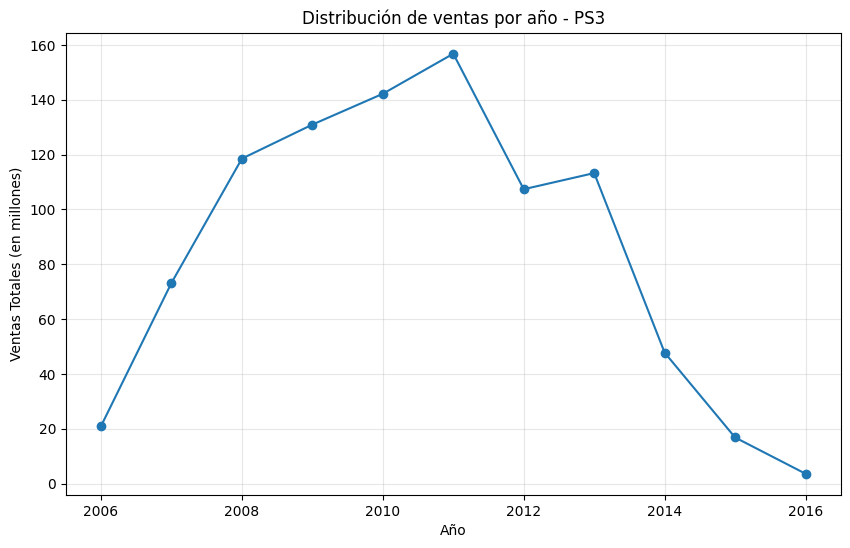

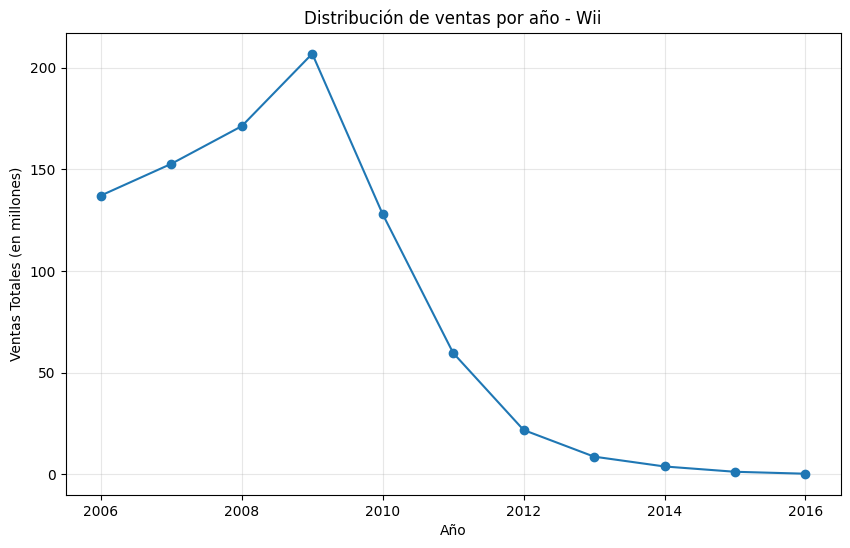

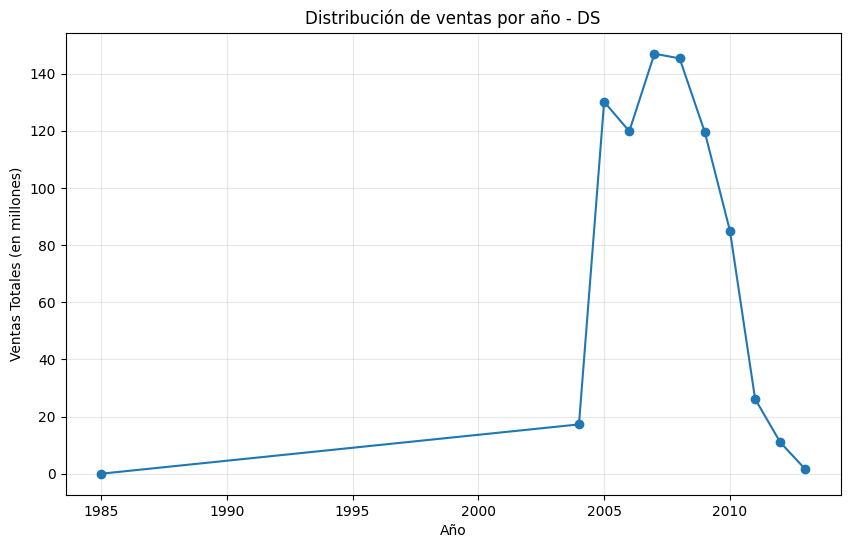

In [15]:
#distribucion(grafico) basada en datos plataforma/año

for platform in top_platforms:

    platform_data = df[df['platform'] == platform]
    
    # Agrupar por año y sumar ventas
    ventas_por_año = platform_data.groupby('year_of_release')['ventas_totales'].sum()

    
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(ventas_por_año.index, ventas_por_año.values, marker='o')
    plt.title(f'Distribución de ventas por año - {platform}')
    plt.grid(True, alpha=0.3)
    plt.xlabel('Año')
    plt.ylabel('Ventas Totales (en millones)')
    plt.show()
# se uso grafico de lineas ya que es el que mejor permite ver los cambios en condicion del tiempo

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Los gráficos confirman que cada generación de consolas tiene un ciclo de vida con un período de auge y una posterior caída, lo que sugiere que el éxito de un videojuego está fuertemente vinculado al momento en el que es lanzado dentro de ese ciclo. Buen trabajo

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>


Puede ser más efectivo incluir todas las gráficas en una sola figura, para que puedas hacer una comparación más directa

</div>

</div>

In [16]:
#plataformas que solian ser populares 
años_recientes = list(range(2012, 2017))
años_antiguos = list(range(1994, 2011))  # recordemos que dara uno menos del maximo

# ventas para plataformas en años anteriores

plataformas_antiguas = df[df['year_of_release'].isin(años_antiguos)]['platform'].unique() #de el primer filtrado selecciono solo los datos de la columna  plataforma, luego solo los valores unicos

print(plataformas_antiguas)
print('---------------------------')

# ventas para plataformas en años anteriores recientes  
plataformas_recientes = df[df['year_of_release'].isin(años_recientes)]['platform'].unique()
print(plataformas_recientes)
print('---------------------------')

#volver a conjunto para evitar duplicados y quitar elementos
plataformas_desaparecidas = set(plataformas_antiguas) - set(plataformas_recientes)

print(plataformas_desaparecidas)

['Wii' 'GB' 'DS' 'X360' 'PS2' 'GBA' 'PS3' 'N64' 'PS' 'SNES' 'XB' 'PC'
 'PSP' 'GC' 'DC' 'SAT' 'GEN' 'WS' 'NG' 'SCD' 'TG16' 'NES' '3DO' 'PCFX']
---------------------------
['PS3' 'X360' 'PS4' '3DS' 'DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'PSP']
---------------------------
{'TG16', 'N64', 'PCFX', 'GBA', 'SCD', 'WS', 'NES', 'SAT', 'SNES', 'PS', 'NG', '3DO', 'XB', 'GEN', 'PS2', 'GB', 'DC', 'GC'}


In [17]:
#tiempo de nuevas plataformas y antiguas plataformas
plataformas_tiempo_min = df.groupby('platform')['year_of_release'].min()
plataformas_tiempo_max = df.groupby('platform')['year_of_release'].max()
tiempo_entre_plataformas = abs(plataformas_tiempo_max - plataformas_tiempo_min)

print(plataformas_tiempo_min)
print('---------------------------')
print(plataformas_tiempo_max)
print('---------------------------')
print(tiempo_entre_plataformas)
print('---------------------------')

platform
2600    1980
3DO     1994
3DS     2011
DC      1998
DS      1985
GB      1988
GBA     2000
GC      2001
GEN     1990
GG      1992
N64     1996
NES     1983
NG      1993
PC      1985
PCFX    1996
PS      1994
PS2     2000
PS3     2006
PS4     2013
PSP     2004
PSV     2011
SAT     1994
SCD     1993
SNES    1990
TG16    1995
WS      1999
Wii     2006
WiiU    2012
X360    2005
XB      2000
XOne    2013
Name: year_of_release, dtype: Int64
---------------------------
platform
2600    1989
3DO     1995
3DS     2016
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PC      2016
PCFX    1996
PS      2003
PS2     2011
PS3     2016
PS4     2016
PSP     2015
PSV     2016
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
Wii     2016
WiiU    2016
X360    2016
XB      2008
XOne    2016
Name: year_of_release, dtype: Int64
---------------------------
platform
2600     9
3DO      1
3DS      5
DC    

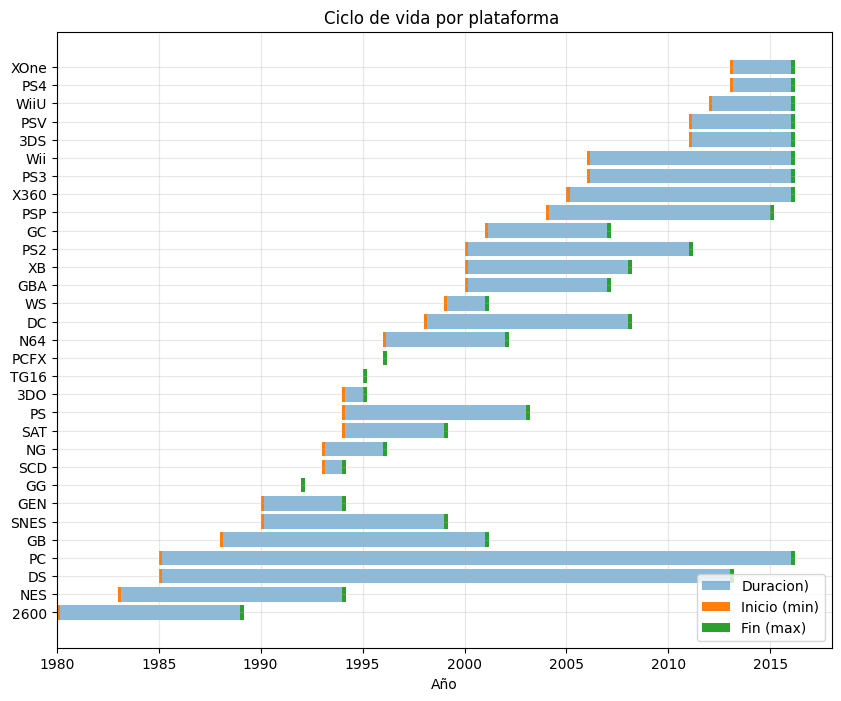

In [18]:
#ver cuando empezaron y cuando desaparecieron
df_span = pd.DataFrame({
    'min_year': plataformas_tiempo_min,
    'max_year': plataformas_tiempo_max,
    'duracion' : tiempo_entre_plataformas
})
# ordenar por cual aparecio primero (antiguedad)
df_span = df_span.sort_values('min_year')
plt.figure(figsize=(10, 8))

y_pos = range(len(df_span)) #para que tenga todos los registros ubicadas en ell orden
plt.barh( #de min a max
    y=y_pos, #posicion de la barra
    width=df_span['duracion'], #tamaño
    left=df_span['min_year'], #donde empieza
    alpha=0.5,
    label='Duracion)'
)

# Resaltar el inicio 
plt.barh(
    y=y_pos,
    width=[0.15]*len(df_span),  # barrita pequeña
    left=df_span['min_year'],
    alpha=1.0,
    label='Inicio (min)'
)

# Resaltar el fin
plt.barh(
    y=y_pos,
    width=[0.2]*len(df_span),
    left=df_span['max_year'],
    alpha=1,
    label='Fin (max)'
)

plt.yticks(y_pos, df_span.index) #poner los nombres de las plataformas como valores de y
plt.xlabel('Año')
plt.title('Ciclo de vida por plataforma ')
plt.legend(loc='lower right') #posicion de las leyendas
plt.grid(alpha=0.3)
plt.show()

In [19]:
#podemos ver que realmente no pasa mucho tiempo antes de la creacion se la siguiente plataforma, lo maximo de años entre una y la aparecion de la siguiente es de 5 años, esto ya siendo el maximo y muy raro de ocurrir, por lo general aparecern en 3 años o menos, vemos tambien que hubo 3 plataformas que asi como aparecieron desaparecieron ya que debaron de terner exitto, 1 plataforma antigua sigue perdurando que es la pc,  vemos que hay 8 plataformas nuevas que siguen exisiendo hazta el ultimo año que es 2016, con esto suman 9 plataformas con ventas activas
#tambien podemos ver que cuando salian 2 o mas juntas, siempre habia una que perduraba mas tiempo dejando que la otra muriera

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has desarrollado una visualización clara y efectiva para representar el ciclo de vida de las plataformas, utilizando un gráfico de barras horizontales que facilita la comparación temporal

</div>

In [20]:
#rango proximo de 2005 a 2016, revisar cuantos lanzamientos hubo para asegurar esto
plataformas_a_ver = ['PC','XOne','PS4', 'WiiU', 'PSV', '3DS', 'Wii', 'PS3','X360']
for plataforma in plataformas_a_ver:
    data = df[(df['platform'] == plataforma) & (df['year_of_release'] >= 2005) & (df['year_of_release'] <= 2016)]
    lanzamientos_por_año = data.groupby('year_of_release').size()
    print(f"Lanzamientos de {plataforma} por año (2005-2016):")
    print(lanzamientos_por_año)
    print(f"\nTotal de lanzamientos {plataforma} en el período: {len(data)}")
    print('-----------------------')

Lanzamientos de PC por año (2005-2016):
year_of_release
2005     37
2006     52
2007     62
2008     76
2009    107
2010     90
2011    139
2012     61
2013     38
2014     47
2015     50
2016     54
dtype: int64

Total de lanzamientos PC en el período: 813
-----------------------
Lanzamientos de XOne por año (2005-2016):
year_of_release
2013    19
2014    61
2015    80
2016    87
dtype: int64

Total de lanzamientos XOne en el período: 247
-----------------------
Lanzamientos de PS4 por año (2005-2016):
year_of_release
2013     16
2014     75
2015    137
2016    164
dtype: int64

Total de lanzamientos PS4 en el período: 392
-----------------------
Lanzamientos de WiiU por año (2005-2016):
year_of_release
2012    32
2013    42
2014    31
2015    28
2016    14
dtype: int64

Total de lanzamientos WiiU en el período: 147
-----------------------
Lanzamientos de PSV por año (2005-2016):
year_of_release
2011     18
2012     53
2013     63
2014    100
2015    110
2016     85
dtype: int64

Tota

In [21]:
#ver las ganancias por año para asegurarnos de caidas o bajas
plataformas_a_ver = ['PC','XOne','PS4', 'WiiU', 'PSV', '3DS', 'Wii', 'PS3','X360']
for plataforma in plataformas_a_ver:
    plataforma_data = df[(df['platform'] == plataforma) & (df['year_of_release'] >= 2005) & (df['year_of_release'] <= 2016)]
    ventas_por_año = plataforma_data.groupby('year_of_release')['ventas_totales'].sum()
    print(f"Ventas totales de {plataforma} por año (2005-2016):")
    print(ventas_por_año)
    print(f"\nTotal de juegos {plataforma} en el período: {ventas_por_año.sum()}")
    print('-----------------------')

Ventas totales de PC por año (2005-2016):
year_of_release
2005     4.37
2006     2.85
2007     9.28
2008    12.42
2009    16.91
2010    24.28
2011    35.03
2012    23.22
2013    12.38
2014    13.28
2015     8.52
2016     5.25
Name: ventas_totales, dtype: float64

Total de juegos PC en el período: 167.79
-----------------------
Ventas totales de XOne por año (2005-2016):
year_of_release
2013    18.96
2014    54.07
2015    60.14
2016    26.15
Name: ventas_totales, dtype: float64

Total de juegos XOne en el período: 159.32000000000005
-----------------------
Ventas totales de PS4 por año (2005-2016):
year_of_release
2013     25.99
2014    100.00
2015    118.90
2016     69.25
Name: ventas_totales, dtype: float64

Total de juegos PS4 en el período: 314.14000000000004
-----------------------
Ventas totales de WiiU por año (2005-2016):
year_of_release
2012    17.56
2013    21.65
2014    22.03
2015    16.35
2016     4.60
Name: ventas_totales, dtype: float64

Total de juegos WiiU en el período:

In [22]:
#determinar periodos de tiempo
periodos = list(range(2013, 2017))  #no quremos llevar a perioros tan lejanos al actual, en este se encuentran las plataformas activas y hay suficientes datos para empezar a trabajar
plataformas = ['PC','XOne','PS4', 'WiiU', 'PSV', '3DS', 'Wii', 'PS3','X360'] #plataformas en apogeo
#el antiguo patron nos dejo ver mas a profundidad la trayectoria de cada plataforma, pero no podemos tomar tantos años de antiguedad ya que esto alteraria las visiones a futuro, asi como que se pensaria en decrecimiento en lugar del cambio del mercado respecto a la actualidad

#que caracteristicas hacen que un juego sea exitoso
#que generos, plataformas y caracteristicas q siempre tienen mejores ventas
#que funciona mejor en cada mercado


In [23]:
#Plataformas líderes - Identificar cuáles crecen y cuáles declinan
datos_periodo = df[df['year_of_release'].isin(periodos)]

ventas_por_plataforma_año = datos_periodo.groupby(['platform', 'year_of_release'])['ventas_totales'].sum()

print(ventas_por_plataforma_año)
print('-----------------')

#convertir a tabla
tabla_comparacion = ventas_por_plataforma_año.unstack()
print(tabla_comparacion)

platform  year_of_release
3DS       2013                56.57
          2014                43.76
          2015                27.78
          2016                15.14
DS        2013                 1.54
PC        2013                12.38
          2014                13.28
          2015                 8.52
          2016                 5.25
PS3       2013               113.25
          2014                47.76
          2015                16.82
          2016                 3.60
PS4       2013                25.99
          2014               100.00
          2015               118.90
          2016                69.25
PSP       2013                 3.14
          2014                 0.24
          2015                 0.12
PSV       2013                10.59
          2014                11.90
          2015                 6.25
          2016                 4.25
Wii       2013                 8.59
          2014                 3.75
          2015                 1.14
  

In [24]:
# con esto podemos ver las plataformas que estuvieron en el perioro de años que elegimos, teniendo 11 plataformas a el analisis, durane 4 años, podemos ve que algunas decrecieron, otras dejaron de tener ventas definiticamente, otras aumentaron y luego decrecieron, realmente no hay ninguna con un cremento continuo, las mas relevantes que vimos antes tuvieron un apogeo y luego cayeron aunque no desaparecieran 

In [25]:
#Diagrama de caja - Ventas globales por plataforma
datos_periodo = df[df['year_of_release'].isin(periodos)]

plataformas_datos = [] #almacenar los datos por cada plataforma
plataformas_nombres = []

plataformas_principales = datos_periodo['platform'].value_counts().index #obtener las plataformas con mas datos en los años elegidos
print(plataformas_principales)
print('-----------------')

for plataforma in plataformas_principales:
    ventas_plataforma = datos_periodo[datos_periodo['platform'] == plataforma]['ventas_totales']
    plataformas_datos.append(ventas_plataforma)
    plataformas_nombres.append(plataforma)

print(plataformas_datos) #11 listas sobre ventas
print('-----------------')
print(plataformas_nombres) #11 plataformas
print('-----------------')

Index(['PS4', 'PSV', 'PS3', '3DS', 'XOne', 'PC', 'X360', 'WiiU', 'PSP', 'Wii',
       'DS'],
      dtype='object')
-----------------
[31       14.63
42       12.62
77        8.58
87        7.98
92        7.66
         ...  
16500     0.01
16503     0.01
16526     0.01
16530     0.01
16585     0.01
Name: ventas_totales, Length: 392, dtype: float64, 868      1.96
2566     0.80
2569     0.80
3086     0.65
3127     0.64
         ... 
16699    0.01
16703    0.01
16707    0.01
16712    0.01
16714    0.01
Name: ventas_totales, Length: 358, dtype: float64, 16       21.05
69        9.36
126       6.46
149       5.86
180       5.27
         ...  
16558     0.01
16638     0.01
16674     0.01
16691     0.01
16710     0.01
Name: ventas_totales, Length: 345, dtype: float64, 33       14.60
47       11.68
96        7.55
108       7.14
184       5.22
         ...  
16608     0.01
16610     0.01
16648     0.01
16668     0.01
16677     0.01
Name: ventas_totales, Length: 303, dtype: float64, 99       7.39

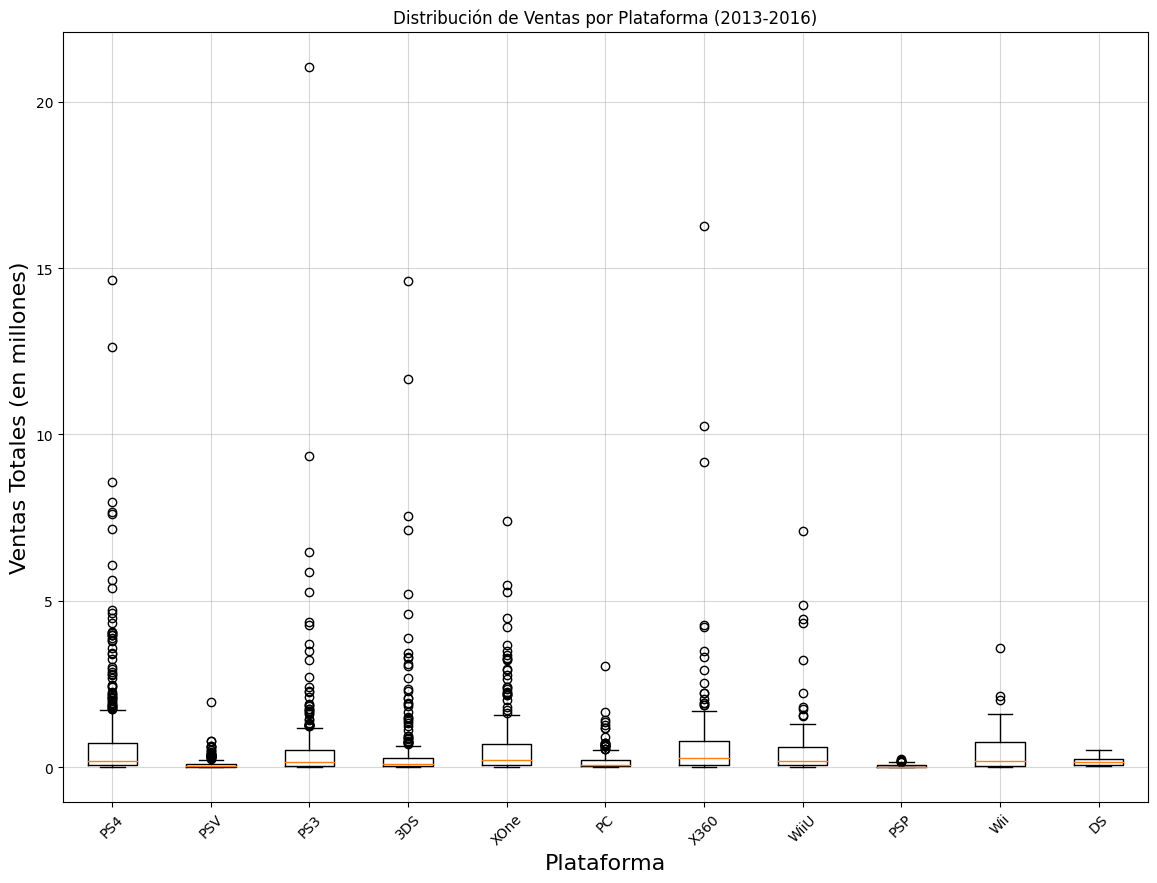

In [26]:
plt.figure(figsize=(14, 10))
caja = plt.boxplot(plataformas_datos, labels=plataformas_nombres)
plt.title('Distribución de Ventas por Plataforma (2013-2016)')
plt.xlabel('Plataforma', fontsize=16)
plt.ylabel('Ventas Totales (en millones)', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.show()

In [27]:
#mostrar las descripciones en forma de tabla
estadisticas_dict = {}

for plataforma in plataformas_principales:
    ventas_plataforma = datos_periodo[datos_periodo['platform'] == plataforma]['ventas_totales']
    estadisticas_dict[plataforma] = {
        'Mediana': ventas_plataforma.median(),
        'Media': ventas_plataforma.mean(),
        'Q1': ventas_plataforma.quantile(0.25),
        'Q3': ventas_plataforma.quantile(0.75),
        'Cantidad de juegos': len(ventas_plataforma)
    }

df_estadisticas = pd.DataFrame(estadisticas_dict).T #crear un diccionario, las claves se convierten en los index y las clases internas en columnas(esto lo hace t pq lo hace al reves de lo predeterminado)
print(df_estadisticas.round(3)) #redondear a 3 digitos

      Mediana  Media     Q1     Q3  Cantidad de juegos
PS4     0.200  0.801  0.060  0.730               392.0
PSV     0.040  0.092  0.020  0.110               358.0
PS3     0.150  0.526  0.040  0.510               345.0
3DS     0.090  0.473  0.040  0.280               303.0
XOne    0.220  0.645  0.060  0.685               247.0
PC      0.080  0.209  0.030  0.230               189.0
X360    0.265  0.735  0.080  0.795               186.0
WiiU    0.200  0.562  0.060  0.595               115.0
PSP     0.020  0.052  0.015  0.070                67.0
Wii     0.180  0.594  0.045  0.755                23.0
DS      0.150  0.192  0.068  0.252                 8.0


In [28]:
# ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?
#si, empzando por la media podemos que ver que varias de estas plataformas estan alrededor de los 0.200 aunque hay algunos que estan muy por debajo, en la media es donde vemos aun mas los  cambios entre unos y otros, unos cerca de 0.800 y otros 0.092, gran variedad de medias, que la media y la mediana esten muy diferentes quesginica que no es una distribucion asimetrica y hay datos sesgados como vemos en las cajas. por lo mismo de lo anterior los cuartiles son diferentes, por ultimo los juegos,, uno pensaria que a mayor cantidad de juegos mejores ventas pero podemos ver que claramente no es asi
#tambien podemos ver que hay varias plataformas que en sus valores atipicos, hay unos muy diferentes del promedio como para ps3

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo obteniendo los *box-plot*. Estos muestran que la mayoría de los juegos tienen ventas bajas, hay valores extremos que dominan en cada plataforma. Esto muestra que el éxito de un juego no depende solo de la consola, sino también de su popularidad y estrategia de marketing.

</div>

Datos de ps4 con reseñas válidas: 251
---------------


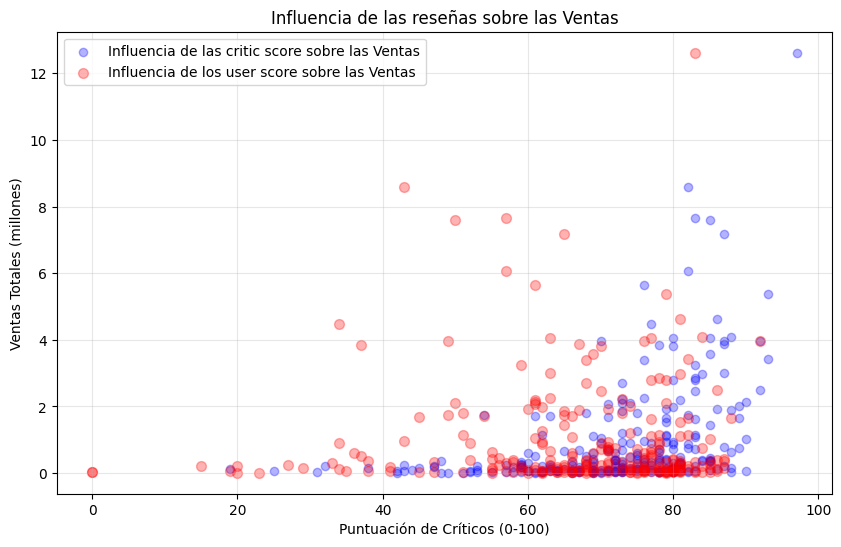

In [29]:
# Análisis de reseñas - Correlación entre reseñas y ventas
plataforma_elegida = 'PS4'
datos_plataforma = datos_periodo[datos_periodo['platform'] == plataforma_elegida]

# quitar nulos
datos_con_reseñas = datos_plataforma.dropna(subset=['critic_score_100', 'user_score_100'])
print(f"Datos de ps4 con reseñas válidas: {len(datos_con_reseñas)}")
print('---------------')

#
plt.figure(figsize=(10, 6))
plt.scatter(
    x=datos_con_reseñas['critic_score_100'], 
    y=datos_con_reseñas['ventas_totales'],
    alpha=0.3,
    color='blue',
    label='Influencia de las critic score sobre las Ventas'
)

plt.scatter(
    x=datos_con_reseñas['user_score_100'], 
    y=datos_con_reseñas['ventas_totales'],
    alpha=0.3,
    color='red',
    label='Influencia de los user score sobre las Ventas',
    s=50
)
plt.legend()
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Ventas Totales (millones)')
plt.title('Influencia de las reseñas sobre las Ventas')
plt.grid(True, alpha=0.3)
plt.show()

In [30]:
# Correlación - Forma correcta
columnas_correlacion = ['ventas_totales', 'user_score_100', 'critic_score_100']
matriz_correlacion = datos_con_reseñas[columnas_correlacion].corr()
print(matriz_correlacion.round(3))

#la correlacion mide que tqn relacionadas estan 2 variables, 
# si es positiva fuerte cuando una variable aumenta la otra tambien

# Cerca de 1: Correlación positiva fuerte
# Cerca de 0: Sin correlación
# Cerca de -1: Correlación negativa fuerte

                  ventas_totales  user_score_100  critic_score_100
ventas_totales             1.000          -0.011             0.406
user_score_100            -0.011           1.000             0.521
critic_score_100           0.406           0.521             1.000


In [31]:
#conclusiones
# vemos que las ventas tienen una  correlacion moderada positiva con critic score, es decir las ventas suben si hay buena critica de expertos y viceversa, en cambio con users tienen unca correlacion negativa, es decir aunque haya malas reseñas las ventas suben aunque esto es ligero, esta es extremadamente debil que del lado negativo fuerte

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Genial, Con esta información se evidencia que la puntuación de los críticos está un poco más relacionada con las ventas que la de los usuarios, aunque la correlación es débil. En User_Score no hay una tendencia clara, pero en Critic_Score, los juegos mejor calificados tienden a vender más. Esto sugiere que las críticas especializadas pueden tener mayor impacto en las ventas.

</div>

In [32]:
#Comparación entre plataformas - Mismos juegos en diferentes plataformas
juegos_multiplataforma = datos_periodo.groupby('name')['platform'].nunique()
print(juegos_multiplataforma)
print(len(juegos_multiplataforma))
print('----------------') #juegos en el periodo, unicos 

juegos_con_varias_plataformas = juegos_multiplataforma[juegos_multiplataforma > 1]
juegos_con_varias_plataformas = juegos_con_varias_plataformas.sort_values(ascending=False)
print(juegos_con_varias_plataformas)
print(len(juegos_con_varias_plataformas))
print('----------------')#minimo 2 veces el mismo juego en diferentes plataformas, estando en el rango de años

name
 Beyblade Burst                                  1
 Fire Emblem Fates                               1
 Frozen: Olaf's Quest                            2
 Haikyu!! Cross Team Match!                      1
1/2 Summer +                                     1
                                                ..
Zoo Tycoon (2013)                                2
Zumba Fitness: World Party                       2
Zyuden Sentai Kyoryuger: Game de Gaburincho!!    1
htoL#NiQ: The Firefly Diary                      1
inFAMOUS: Second Son                             1
Name: platform, Length: 1263, dtype: int64
1263
----------------
name
LEGO Marvel Super Heroes               9
FIFA 14                                9
Lego Batman 3: Beyond Gotham           8
LEGO Jurassic World                    8
The LEGO Movie Videogame               8
                                      ..
Legend of Kay                          2
Lara Croft and the Temple of Osiris    2
LEGO Ninjago: Shadow of Ronin       

In [33]:
# Elegir un juego popular para analizar
top_5_mas_plataformas = juegos_con_varias_plataformas.head()
print(top_5_mas_plataformas)
print('----------------')

for juego in top_5_mas_plataformas.index:
    ventas_por_plataforma = datos_periodo[datos_periodo['name'] == juego]
    print(f"Ventas de '{juego}' (disponible en {top_5_mas_plataformas[juego]} plataformas):")
    resultado = ventas_por_plataforma[['platform', 'ventas_totales']].sort_values('ventas_totales', ascending=False)
    print(resultado)
    print('----------------')

name
LEGO Marvel Super Heroes        9
FIFA 14                         9
Lego Batman 3: Beyond Gotham    8
LEGO Jurassic World             8
The LEGO Movie Videogame        8
Name: platform, dtype: int64
----------------
Ventas de 'LEGO Marvel Super Heroes' (disponible en 9 plataformas):
     platform  ventas_totales
730      X360            2.22
945       PS3            1.83
1139      PS4            1.62
1959     XOne            1.05
2313      3DS            0.89
2778     WiiU            0.74
3876      PSV            0.51
5054       DS            0.38
8369       PC            0.17
----------------
Ventas de 'FIFA 14' (disponible en 9 plataformas):
     platform  ventas_totales
126       PS3            6.46
271      X360            4.22
469       PS4            3.01
1753     XOne            1.16
4699      PSV            0.41
4809       PC            0.40
4985      Wii            0.38
6871      3DS            0.23
7875      PSP            0.19
----------------
Ventas de 'Lego Batman 3: 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo analizando los juegos multiplataformas, con esta información es posible relacionar los juegos con mayor popularidad y las plataformas más comercializadas. 

</div>

In [34]:


#Análisis de géneros - Distribución y rentabilidad por género
generos_rentables =  datos_periodo.groupby('genre')['ventas_totales'].sum()

generos_rentables = generos_rentables.sort_values(ascending=False)
print(generos_rentables)
print('----------------')


genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: ventas_totales, dtype: float64
----------------


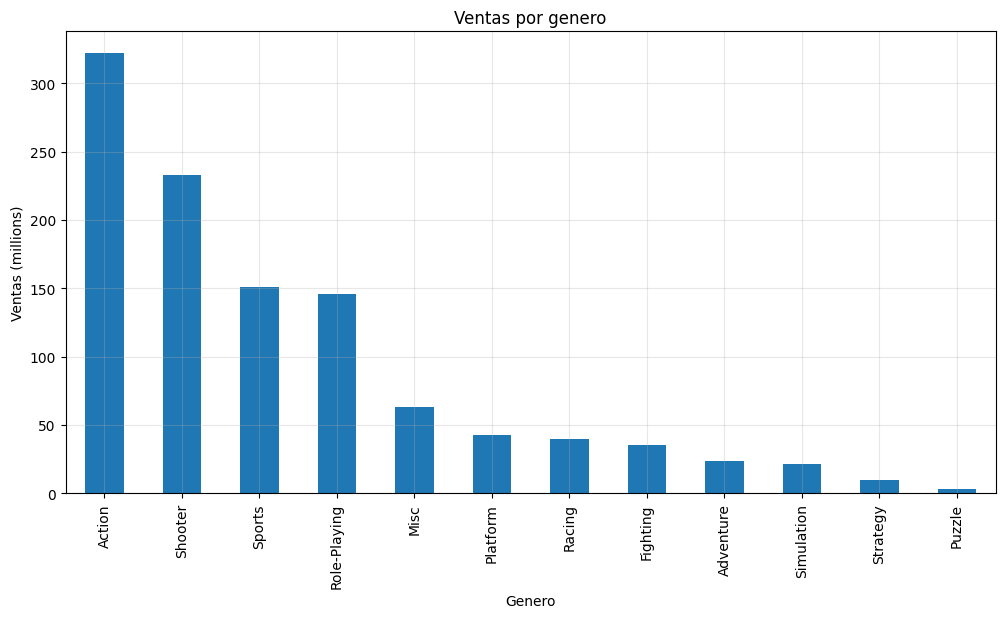

In [35]:

#graficar
plt.figure(figsize=(12, 6))
generos_rentables.plot(
    kind='bar',
    title='Ventas por genero',
    xlabel='Genero',
    ylabel='Ventas (millions)')
plt.grid(True, alpha=0.3)
plt.show()


In [36]:
# ¿Qué se puede decir de los géneros más rentables? 
# vemos que los juegos de accion han tenido mayores ventas a compracion de otros juegos que casi no generan como puzzle, esto siendo en los años mas recientes, pero no solo eso podemos ver que los juegos que mas generan tiene una capateristica clave en ese tipo de juegos y quiza es el cooperativo, aunque no todos los juegos de action lo tienen es algo que se esta popularizanod, y podria ser una proble caracteristica con los demas generos con grandes ventas
# ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
# el genero con muchas ventas es accion con mas de 300, seguido de shooters, deportes y roleplay que tambien podriamos considerar algo sobresalientes, de ahi los demas generos estan generando ventas bajas llegando casi a nada

year_of_release    2013   2014   2015   2016
genre                                       
Action           122.51  97.23  72.02  30.11
Adventure          6.09   5.57   8.16   3.82
Fighting           7.09  15.85   7.90   4.47
Misc              25.27  23.38  11.57   2.60
Platform          24.54   8.81   6.05   3.23
Puzzle             0.96   1.49   0.71   0.01
Racing            12.37  16.66   8.07   2.79
Role-Playing      44.45  45.62  37.64  18.18
Shooter           62.04  65.21  67.51  38.22
Simulation         8.63   5.58   5.66   1.89
Sports            41.17  45.15  40.84  23.49
Strategy           6.12   0.98   1.85   1.13


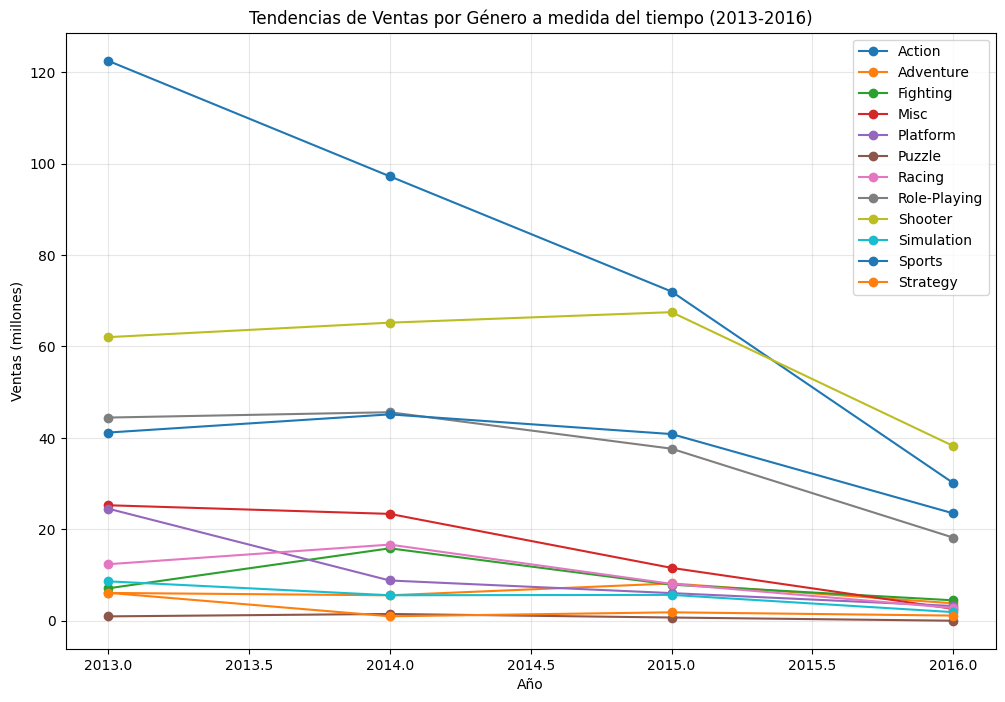

In [37]:
#Comparación por años 
ventas_genero_año = datos_periodo.pivot_table(
    values='ventas_totales', 
    index='genre', 
    columns='year_of_release', 
    aggfunc='sum',  #cuando hay varios valores los suma todos, por si hay varios juegos del mismo genero en el mismo año pues se suman las ventas de todos
    fill_value=0 #en lugar de nan decir (no es conocido) mejor usar 0 para decir que no hubo ventar, ya que udar dropna puede hacer que perdamos informacion importante
)
print(ventas_genero_año)

plt.figure(figsize=(12, 8))
for genero in ventas_genero_año.index:
    plt.plot(ventas_genero_año.columns, 
             ventas_genero_año.loc[genero], 
             marker='o', 
             label=genero)

plt.title('Tendencias de Ventas por Género a medida del tiempo (2013-2016)')
plt.xlabel('Año')
plt.ylabel('Ventas (millones)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [38]:
#Análisis de cantidad vs rentabilidad
cantidad_juegos_genero = datos_periodo.groupby('genre').size()
print(cantidad_juegos_genero)
print('----------------')

genre
Action          766
Adventure       245
Fighting         80
Misc            155
Platform         74
Puzzle           17
Racing           85
Role-Playing    292
Shooter         187
Simulation       62
Sports          214
Strategy         56
dtype: int64
----------------


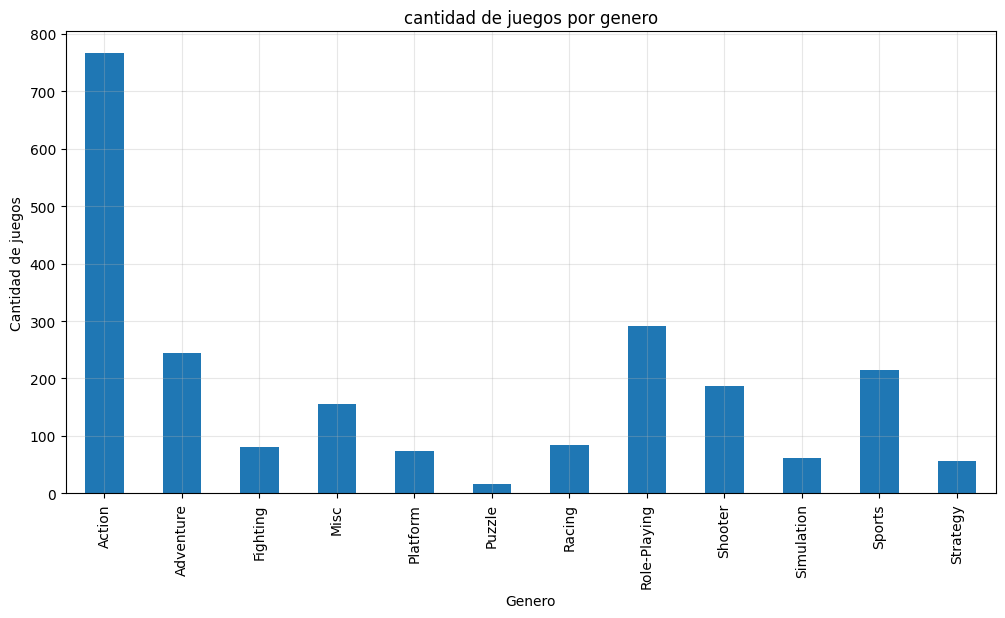

In [39]:
#graficar
plt.figure(figsize=(12, 6))
cantidad_juegos_genero.plot(
    kind='bar',
    title='cantidad de juegos por genero',
    xlabel='Genero',
    ylabel='Cantidad de juegos')
plt.grid(True, alpha=0.3)
plt.show()


In [40]:
#estatiditicas basicas
generos_estadisticas = datos_periodo.groupby('genre').agg({
    'ventas_totales': ['sum', 'mean', 'count']
}).round(3)

#dar nombres a las columnas para mejor comprensibilidad
generos_estadisticas.columns = ['Ventas_Totales', 'Ventas_Promedio', 'Cantidad_Juegos']
generos_estadisticas = generos_estadisticas.sort_values('Ventas_Totales', ascending=False)
print(generos_estadisticas)

              Ventas_Totales  Ventas_Promedio  Cantidad_Juegos
genre                                                         
Action                321.87            0.420              766
Shooter               232.98            1.246              187
Sports                150.65            0.704              214
Role-Playing          145.89            0.500              292
Misc                   62.82            0.405              155
Platform               42.63            0.576               74
Racing                 39.89            0.469               85
Fighting               35.31            0.441               80
Adventure              23.64            0.096              245
Simulation             21.76            0.351               62
Strategy               10.08            0.180               56
Puzzle                  3.17            0.186               17


In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16715 non-null  object 
 1   platform          16715 non-null  object 
 2   year_of_release   16446 non-null  Int64  
 3   genre             16715 non-null  object 
 4   na_sales          16715 non-null  float64
 5   eu_sales          16715 non-null  float64
 6   jp_sales          16715 non-null  float64
 7   other_sales       16715 non-null  float64
 8   critic_score_100  8137 non-null   Int64  
 9   user_score_100    10014 non-null  Int64  
 10  rating            16715 non-null  object 
 11  user_score_tbd    16715 non-null  bool   
 12  critic_score_10   8137 non-null   float64
 13  user_score_10     10014 non-null  float64
 14  ventas_totales    16715 non-null  float64
dtypes: Int64(3), bool(1), float64(7), object(4)
memory usage: 1.8+ MB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo! En efecto se observa que los juegos de acción y deportes lideran en ventas. Los géneros de rol y shooter también destacan, aunque en menor medida. En cambio, los de estrategia, aventura y puzzle muestran ventas más bajas, lo que indica una demanda más limitada.

</div>

In [42]:
#region NA cinco plataformas principales.
region_NA = datos_periodo.groupby('platform')['na_sales'].sum()  # Sumar ventas por plataforma
region_NA = region_NA.sort_values(ascending=False)
top5_NA = region_NA.head()
print(region_NA)
print('-----------------')
print(top5_NA)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
WiiU     29.21
PC       11.11
Wii       6.56
PSV       5.04
DS        0.57
PSP       0.00
Name: na_sales, dtype: float64
-----------------
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64


In [43]:
region_JP = datos_periodo.groupby('platform')['jp_sales'].sum()  # Sumar ventas por plataforma
region_JP = region_JP.sort_values(ascending=False)
top5_JP = region_JP.head()
print(region_JP)
print('-----------------')
print(top5_JP)

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
PSP      3.29
X360     0.51
XOne     0.34
Wii      0.05
DS       0.00
PC       0.00
Name: jp_sales, dtype: float64
-----------------
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


In [44]:
#region EU cinco plataformas principales.
region_EU = datos_periodo.groupby('platform')['eu_sales'].sum()  # Sumar ventas por plataforma
region_EU = region_EU.sort_values(ascending=False)
top5_EU = region_EU.head()
print(region_EU)
print('-----------------')
print(top5_EU)

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
PC       25.36
WiiU     19.85
PSV       6.10
Wii       5.93
DS        0.85
PSP       0.17
Name: eu_sales, dtype: float64
-----------------
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64


In [45]:
#unir en un dataframe para visualizar
comparacion_regiones = pd.DataFrame({
    'NA': top5_NA,
    'EU': top5_EU, 
    'JP': top5_JP
})
print(comparacion_regiones.isna().sum()) #ver valores nulos, estos se deben a que si una plataforma no existe en una columna se dara nulo
print('-------------------')

comparacion_regiones = comparacion_regiones.fillna(0)
print(comparacion_regiones.round(2))

NA    2
EU    2
JP    2
dtype: int64
-------------------
              NA      EU     JP
platform                       
3DS        38.20   30.96  67.81
PS3        63.50   67.81  23.35
PS4       108.74  141.09  15.96
PSV         0.00    0.00  18.59
WiiU        0.00    0.00  10.88
X360       81.66   42.52   0.00
XOne       93.12   51.59   0.00


In [46]:
#Describe las variaciones en sus cuotas de mercado de una región a otra.
#Las cuotas de mercado son el porcentaje que representa cada plataforma del total de ventas en esa región.
cuotas_NA = (top5_NA / region_NA.sum() * 100).round(2)
cuotas_EU = (top5_EU / region_EU.sum() * 100).round(2)
cuotas_JP = (top5_JP / region_JP.sum() * 100).round(2)
print("Cuotas de mercado NA (%):")
print(cuotas_NA)
print("Cuotas de mercado EU (%):")
print(cuotas_EU)
print("Cuotas de mercado JP (%):")
print(cuotas_JP)


Cuotas de mercado NA (%):
platform
PS4     24.84
XOne    21.27
X360    18.66
PS3     14.51
3DS      8.73
Name: na_sales, dtype: float64
Cuotas de mercado EU (%):
platform
PS4     35.97
PS3     17.29
XOne    13.15
X360    10.84
3DS      7.89
Name: eu_sales, dtype: float64
Cuotas de mercado JP (%):
platform
3DS     48.17
PS3     16.59
PSV     13.21
PS4     11.34
WiiU     7.73
Name: jp_sales, dtype: float64


In [47]:
#explicacion de lo anterior
# podemos ver que realmente hay variaciones en lo que genera cada plataforma dependiendo la region, pero tambien debemos tener en cuenta las ventas de cada totales de cada region, primero podemos ver que japon tiene 2 plataformas que generan solo aqui, en las otras 2 regiones estas son entran en el top, despues podemos ver que una misma plataforma puede generar menos cantidad del total segun la rgion como es el caso de la ps4 y ps3, estos realmente varian

In [48]:
#5 generos principales por region

generos_eu = datos_periodo.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
print(generos_eu.head())
print('-'*15)

generos_na =  datos_periodo.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
print(generos_na.head())
print('-'*15)

generos_jp =  datos_periodo.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
print(generos_jp.head())
print('-'*15)


genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64
---------------
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64
---------------
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64
---------------


In [49]:
# #explicacion 
# podemos ver que en estados unidos predominan los juegos de accion, disparos y deportes habiendo una diferencia de aproximadamente 27, de esto a los ultimos 2 generos hay mucha diferencia
# em la region de eurapa sigue siendo parecido en cuestion de los primeros 3 generos, pero en este caso de disparos que es el segundo genero al tercero hay una gran diferencia, no se diga de los demas porque realmente es mucha brecha
# en cambio en japon podemos primero ver un cambio en el orden de generos con mayores ventas, siendo aqui role-playing con 51 y despues accion con 10 menos que el primer puesto, de aqui a los demas generos hay mucha diferencia, siendo los ultimos muy bajos en compracion
# aparte de eso podemos ver que las ventas por region son muy diferentes  entre los tops, japon genera menos en cualquier genero que eu y na

In [50]:
#Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
print(datos_periodo['rating'].value_counts()) #ver que valores tenemos y cuantos de cada uno
print('-'*20)

ventas_rating_na = datos_periodo.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
ventas_rating_eu = datos_periodo.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
ventas_rating_jp = datos_periodo.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print("Ventas en millones por clasificación  Norteamérica:")
print(ventas_rating_na)
print('-'*15)

print("Ventas en millones por clasificación Europa")
print(ventas_rating_eu)
print('-'*15)

print("Ventas en millones por clasificación Japón")
print(ventas_rating_jp)

Sin clasificación    977
M                    369
T                    333
E                    302
E10+                 252
Name: rating, dtype: int64
--------------------
Ventas en millones por clasificación  Norteamérica:
rating
M                    165.21
Sin clasificación     89.42
E                     79.05
E10+                  54.24
T                     49.79
Name: na_sales, dtype: float64
---------------
Ventas en millones por clasificación Europa
rating
M                    145.32
E                     83.36
Sin clasificación     78.91
E10+                  42.69
T                     41.95
Name: eu_sales, dtype: float64
---------------
Ventas en millones por clasificación Japón
rating
Sin clasificación    85.05
T                    20.59
E                    15.14
M                    14.11
E10+                  5.89
Name: jp_sales, dtype: float64


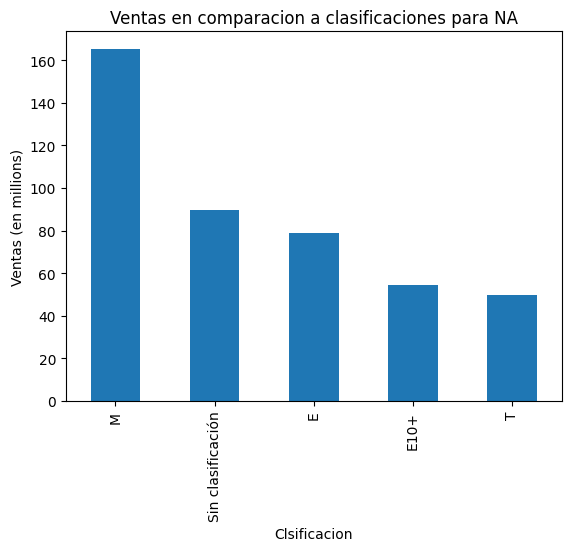

In [51]:
ventas_rating_na.plot(
        kind='bar',
        title='Ventas en comparacion a clasificaciones para NA',
        xlabel='Clsificacion',
        ylabel='Ventas (en millions)')
plt.show()

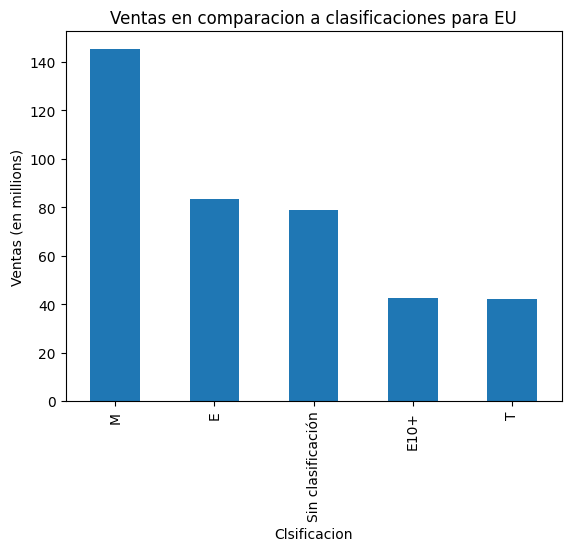

In [52]:
ventas_rating_eu.plot(
        kind='bar',
        title='Ventas en comparacion a clasificaciones para EU',
        xlabel='Clsificacion',
        ylabel='Ventas (en millions)')
plt.show()

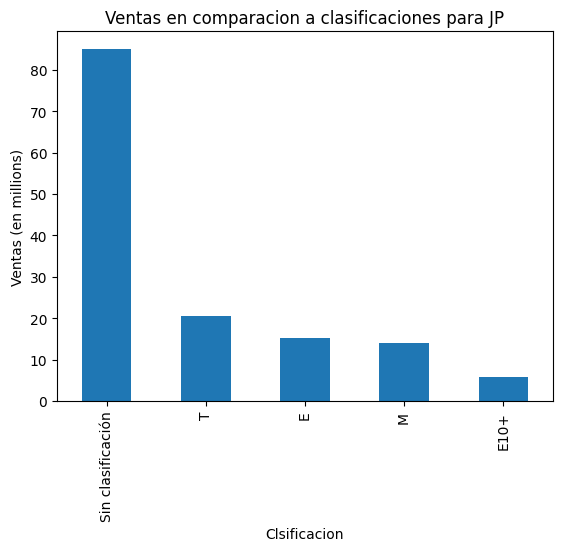

In [53]:
ventas_rating_jp.plot(
        kind='bar',
        title='Ventas en comparacion a clasificaciones para JP',
        xlabel='Clsificacion',
        ylabel='Ventas (en millions)')
plt.show()

In [54]:
# cuotas pero ahora en base a las reseñas
cuotas_rating_na = (ventas_rating_na / ventas_rating_na.sum() * 100).round(3)
cuotas_rating_eu = (ventas_rating_eu / ventas_rating_eu.sum() * 100).round(3)
cuotas_rating_jp = (ventas_rating_jp / ventas_rating_jp.sum() * 100).round(3)

print("NA:", cuotas_rating_na)
print("EU:", cuotas_rating_eu)
print("JP:", cuotas_rating_jp)

NA: rating
M                    37.744
Sin clasificación    20.429
E                    18.060
E10+                 12.392
T                    11.375
Name: na_sales, dtype: float64
EU: rating
M                    37.050
E                    21.253
Sin clasificación    20.118
E10+                 10.884
T                    10.695
Name: eu_sales, dtype: float64
JP: rating
Sin clasificación    60.413
T                    14.626
E                    10.754
M                    10.023
E10+                  4.184
Name: jp_sales, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Carolina has logrado identificar claramente las diferencias entre América del Norte, Europa y Japón, no solo en términos de plataformas y géneros predominantes, sino también en la influencia de las clasificaciones ESRB, lo que refleja tu capacidad para conectar datos con tendencias culturales y de comportamiento. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para lograr un análisis comparativo más efectivo, sería beneficioso presentar cada sección de información empleando un único diagrama de barras. Al asignar un color distintivo a cada región, podremos crear una representación visual unificada que facilite la identificación de patrones y diferencias entre las distintas áreas. Esta consolidación de datos no solo optimizará el espacio visual, sino que también permitirá al lector establecer conexiones y comparaciones de manera más intuitiva y directa entre los distintos conjuntos de información. Acá te muestro un ejemplo 

<img src="https://www.analyticslane.com/storage/2022/06/matplotlib-barras-adyacentes.png.webp" width="400">

En el siguiente enlace se explica cómo se puede construir: [Gráficos de Barras](https://www.analyticslane.com/2022/07/05/graficos-de-barras-en-matplotlib/)

</div>
</div>

In [55]:
alpha = 0.05 # el nivel de significancia estadística crítica

In [56]:
# probar la hipotesis : Las calificaciones promedio de los usuarios para las plataformas  y PC son las mismas.

plataforma_uno = 'XOne'
plataforma_dos = 'PC'

datos_xbox = datos_periodo[(datos_periodo['platform'] == plataforma_uno) & (datos_periodo['user_score_100'].notna())]['user_score_100']
datos_pc = datos_periodo[(datos_periodo['platform'] == plataforma_dos) & (datos_periodo['user_score_100'].notna())]['user_score_100']

datos_xbox = datos_xbox.astype(float)
datos_pc = datos_pc.astype(float)

#la hipótesis nula siempre implica la ausencia de diferencias.

#hipotesis nula: No hay diferencia entre los promedios
#hipotesis alternativa: Sí hay diferencia entre los promedios

results = st.ttest_ind(datos_xbox, datos_pc) # si el valor p es menor que alpha, rechazamos la hipótesis
print('valor p: ', results.pvalue) 
if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
    print('hipotesis alternativa: Sí hay diferencia entre los promedios')
else:
    print("No podemos rechazar la hipótesis nula")
    print('hipotesis nula: No hay diferencia entre los promedios')

#No hay evidencia estadística suficiente para afirmar que las calificaciones promedio de usuarios difieren entre Xbox One y PC
#Los usuarios califican de manera similar los juegos en Xbox One y PC durante el período 2013-2016. 

valor p:  0.7262602004956031
No podemos rechazar la hipótesis nula
hipotesis nula: No hay diferencia entre los promedios


In [57]:
print(f"Promedio Acción: {datos_xbox.mean()}")
print(f"Promedio Deportes: {datos_pc.mean()}")
#aqui podemos confirmar lo anterior, realmente no habia gran variacion entre ambos promedios, es minimo

Promedio Acción: 61.49740932642487
Promedio Deportes: 60.7375


In [58]:
# probar la hipotesis : Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
genero_uno = 'Action'
genero_dos = 'Sports'

datos_accion = datos_periodo[(datos_periodo['genre'] == genero_uno) & (datos_periodo['user_score_100'].notna())]['user_score_100']
datos_deportes = datos_periodo[(datos_periodo['genre'] == genero_dos) & (datos_periodo['user_score_100'].notna())]['user_score_100']

datos_accion = datos_accion.astype(float)
datos_deportes = datos_deportes.astype(float)

#la hipótesis nula siempre implica la ausencia de diferencias.

#hipotesis nula: no hay diferencia entre los promedios
#hipotesis alternativa: si hay diferencia entre los promedios

results = st.ttest_ind(datos_accion, datos_deportes) # si el valor p es menor que alpha, rechazamos la hipótesis
print('valor p: ', results.pvalue) 

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
    print('hipotesis alternativa: Sí hay diferencia entre los promedios')
else:
    print("No podemos rechazar la hipótesis nula")
    print('hipotesis nula: No hay diferencia entre los promedios')


#podemos decir que realmente los valores eran muy alejados unos de otros, al ser p un valor muy pequeño ppdemos decir que la diferencia es muy real y no solo una coincidencia, los promedios estan alejados entre si


valor p:  1.0163952264107953e-09
Rechazamos la hipótesis nula
hipotesis alternativa: Sí hay diferencia entre los promedios


In [59]:
print(f"Promedio Acción: {datos_accion.mean()}")
print(f"Promedio Deportes: {datos_deportes.mean()}")
#aqui podemos confirmar lo anterior, realmente si habia gran variacion entr ambos promedios

Promedio Acción: 61.56944444444444
Promedio Deportes: 48.445086705202314


In [60]:
# #explica : Cómo formulaste las hipótesis nula y alternativa.
# como dije antes en la hipótesis nula siempre implica la ausencia de diferencias, y la hipotesis alternativa da a una interpretacion contraria, nunca negamos o aseguramos pero nos orientamos a el que tenga mas datos estadisticos
# #use la informacion que se nos dio al comprar como:
# -Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes, en cambio en esta necesitamos voltearla ya que si son diferentes implica que no puede ser nula, en la nula decimos que no hay cambios
# -Las calificaciones promedio de los usuarios para las plataformas  y PC son las mismas., aqui asi como esta seria la nula ya que implica que no hay diferencias

In [61]:
#explica : Qué criterio utilizaste para probar las hipótesis y por qué.
# use un valor predeterminado de alpha usado en teoria, y use ttest_ind para comparar dos medias independientes

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has implementado correctamente la prueba de hipótesis utilizando `ttest_ind`, estableciendo de forma clara las hipótesis nula y alternativa, y justificando adecuadamente su formulación. Es clave cómo te asegura que no haya valores nulos antes de aplicar la prueba, y cómo se verifica el resultado con el análisis de los promedios.


</div>

In [62]:
# #conclusion general
# primero hablemos de que las plataformas dominantes son PS4, Xbox One y PS3 en ventas globales, pude notar que plataformas como Wii y X360 mostraron caída tras su apogeo
# y las plataformas tienen alrededor de 5 años donde son activas antes de que llegue una nueva a remplazarlas, habklando ahora de regiones pude notar que en na y eu los generos que dominan son accion y shooters
# mientras que en japon es mas famoso el genero de role pero este solo es popular aqui y no genera tantas ventas como los otros genreso en las otras regiones
# hablando de lo anterior podemos ver que los generos mas rentables son accion, disparos y deportes que son los que mas prevalecen a lo largo del tiempo y tuvieron un apogeo aunque actualmente estan disminuyendo
# vimos que la calificacion de los expertos tiene impacto en las ventas y que la de usuarios no genera tanto impacto en las mimas, vimos que los juegos con m en clasificacion generan mas ventas en na y eu
# basado en lo anterior podemos ver que los juegos de accion son los mas convenientes para las plataformas en apogeo, esto aplicaria para las regiones na y eu, en japon se puede generar alguno de role pero esto realmente no es tan conveniente segun las ventas que genran, por lo que recomiendo centrarse en las plataformas que realmente generan grandes cantidades de dinero

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has logrado sintetizar los principales hallazgos del análisis relacionando plataformas, géneros y regiones de manera coherente.

</div>

In [63]:
# no se como agregar celdas de texto o encabezados, por fvor dejarme un ejemplo abajo

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Puedes usar **Markdown** para agregar texto al notebook, esto permitirá que tu trabajo tenga un mejor estilo, y sea más claro al momento de revisarlo, para esto, el menú desplegable de la barra de herramientas selecciona el formato **Markdown** para la celda donde quieres agregar texto. 

<img src="https://digitalhumanities.hkust.edu.hk/wp-content/uploads/2023/08/jupyter-notebook-cell-interface.gif" width="500">   

Acá te comparto información sobre sintaxis básica para incluir tus textos con [Markdown](https://tutorialmarkdown.com/sintaxis)

Para agregar una celda solo debes darle en íncono de `+` en la barra de herramientas

</div>